<a href="https://colab.research.google.com/github/bahareghasemi/CNN-Fashion-Classification/blob/main/FashionImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Image Classification by **CNN**

## Importing necessary libraries and modules

In [ ]:
! pip install split-folders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Mapping labels to their names

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
label_counts = np.bincount(train_labels)
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} occurrences of "+ labels[label])

Label 0: 6000 occurrences of T-shirt/top
Label 1: 6000 occurrences of Trouser
Label 2: 6000 occurrences of Pullover
Label 3: 6000 occurrences of Dress
Label 4: 6000 occurrences of Coat
Label 5: 6000 occurrences of Sandal
Label 6: 6000 occurrences of Shirt
Label 7: 6000 occurrences of Sneaker
Label 8: 6000 occurrences of Bag
Label 9: 6000 occurrences of Ankle Boot


## Sample images in Train Dataset

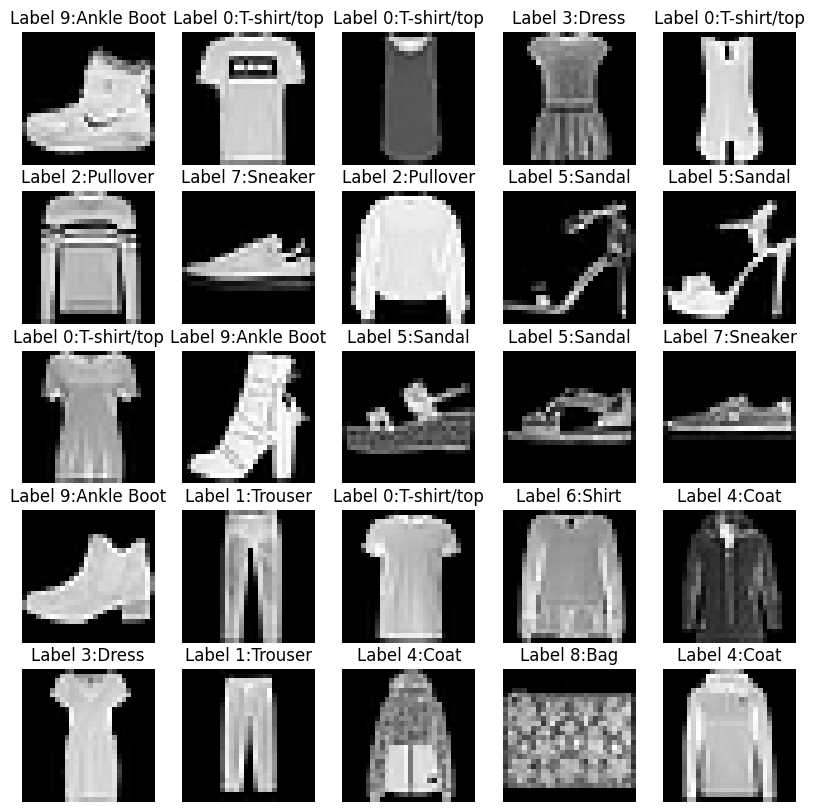

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label {train_labels[i]}'+":"+labels[train_labels[i]])
    plt.axis('off')
plt.show()

## Sample images in Test Dataset

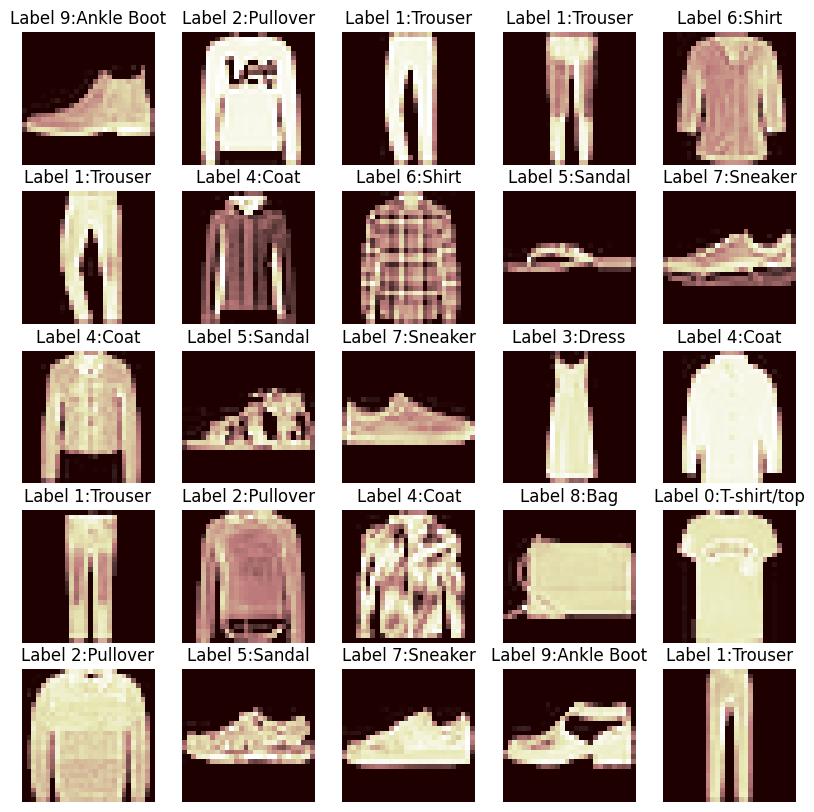

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='pink')
    plt.title(f'Label {test_labels[i]}'+":"+labels[test_labels[i]])
    plt.axis('off')
plt.show()

## CNN Models

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

## First Model

In [ ]:
model1 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),#32 filters with a kernel size of 3x3, using the ReLU activation function. Input shape of (28, 28, 1) indicates grayscale images of size 28x28 pixels.
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),#64 filters with a kernel size of 3x3, using the ReLU activation function. Extracts more complex features from the images.
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),#128 filters with a kernel size of 3x3, using the ReLU activation function. Further extracts higher-level features from the images.
    Flatten(),
    Dense(128, activation='relu'),#Fully connected layer with 128 neurons and ReLU activation function.
    Dropout(0.5),#to avoid overfitting - an avg of 50% of neurons will be set to zero during training out of the 128 neurons
    Dense(10, activation='softmax')#output layer with 10 neurons because there's 10 categories for output labels
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train Model

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=2024)
history = model1.fit(X_train, y_train, batch_size=128,
                     epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6250 - loss: 1.0352 - val_accuracy: 0.8388 - val_loss: 0.4412
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8244 - loss: 0.4817 - val_accuracy: 0.8611 - val_loss: 0.3737
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8579 - loss: 0.3926 - val_accuracy: 0.8786 - val_loss: 0.3331
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8752 - loss: 0.3499 - val_accuracy: 0.8923 - val_loss: 0.2967
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8871 - loss: 0.3137 - val_accuracy: 0.8830 - val_loss: 0.3104
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8959 - loss: 0.2943 - val_accuracy: 0.8927 - val_loss: 0.2847
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9004 - loss: 0.2729 - val_accuracy: 0.9031 - val_loss: 0.2652
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9064 - loss: 0.2573 - val_accuracy: 0.

## Visualizing the Loss and Accuracies

Text(0.5, 1.0, 'Train Accuracy: 0.91% \n Test Accuracy: 0.47%')

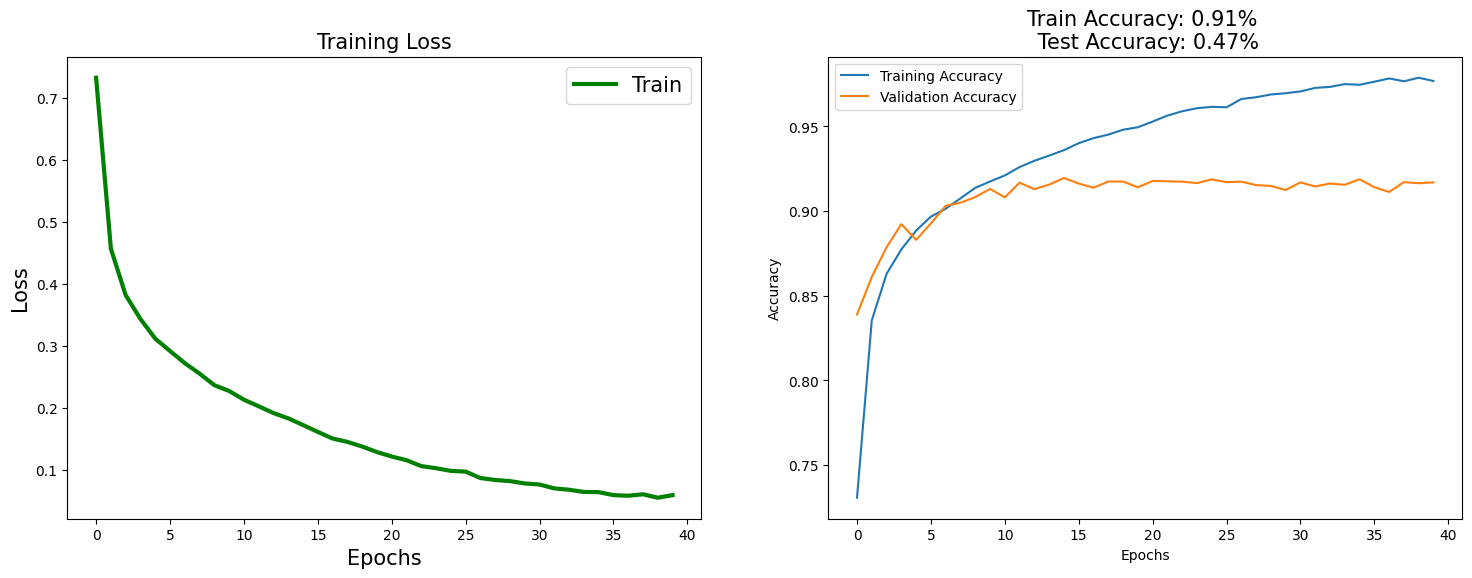

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(history.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
score1 = model1.evaluate(test_images, test_labels, verbose=0)
ax[1].set_title(f'Train Accuracy: {score1[1]:.2f}% \n Test Accuracy: {score1[0]:.2f}%', fontsize = 15)

## Second model

In [ ]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),#32 filters with a kernel size of 3x3, using the ReLU activation function. Input shape of (28, 28, 1) indicates grayscale images of size 28x28 pixels.
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),#to avoid overfitting - an avg of 20% of neurons will be set to zero during training out of the 32 neurons
    Conv2D(64, kernel_size=(3, 3), activation='relu'),#64 filters with a kernel size of 3x3, using the ReLU activation function. Extracts more complex features from the images.
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),#to avoid overfitting - an avg of 30% of neurons will be set to zero during training out of the 64 neurons
    Conv2D(128, kernel_size=(3, 3), activation='relu'),#128 filters with a kernel size of 3x3, using the ReLU activation function. Further extracts higher-level features from the images.
    Dropout(0.40),#to avoid overfitting - an avg of 40% of neurons will be set to zero during training out of the 128 neurons
    Flatten(),
    Dense(128, activation='relu'),#Fully connected layer with 128 neurons and ReLU activation function.
    Dropout(0.25),#to avoid overfitting - an avg of 25% of neurons will be set to zero during training out of the 128 neurons
    Dense(10, activation='softmax')#output layer with 10 neurons because there's 10 categories for output labels
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train Model

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=128,
                    epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6032 - loss: 1.0609 - val_accuracy: 0.8339 - val_loss: 0.4578
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8174 - loss: 0.4876 - val_accuracy: 0.8677 - val_loss: 0.3636
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8502 - loss: 0.4099 - val_accuracy: 0.8836 - val_loss: 0.3229
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8635 - loss: 0.3665 - val_accuracy: 0.8862 - val_loss: 0.3047
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8773 - loss: 0.3381 - val_accuracy: 0.8916 - val_loss: 0.2847
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8793 - loss: 0.3249 - val_accuracy: 0.9008 - val_loss: 0.2756
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8840 - loss: 0.3118 - val_accuracy: 0.9018 - val_loss: 0.2651
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8916 - loss: 0.2983 - val_accuracy: 0

## Visualizing the Loss and Accuracies

Text(0.5, 1.0, 'Train Accuracy: 0.92% \n Test Accuracy: 0.22%')

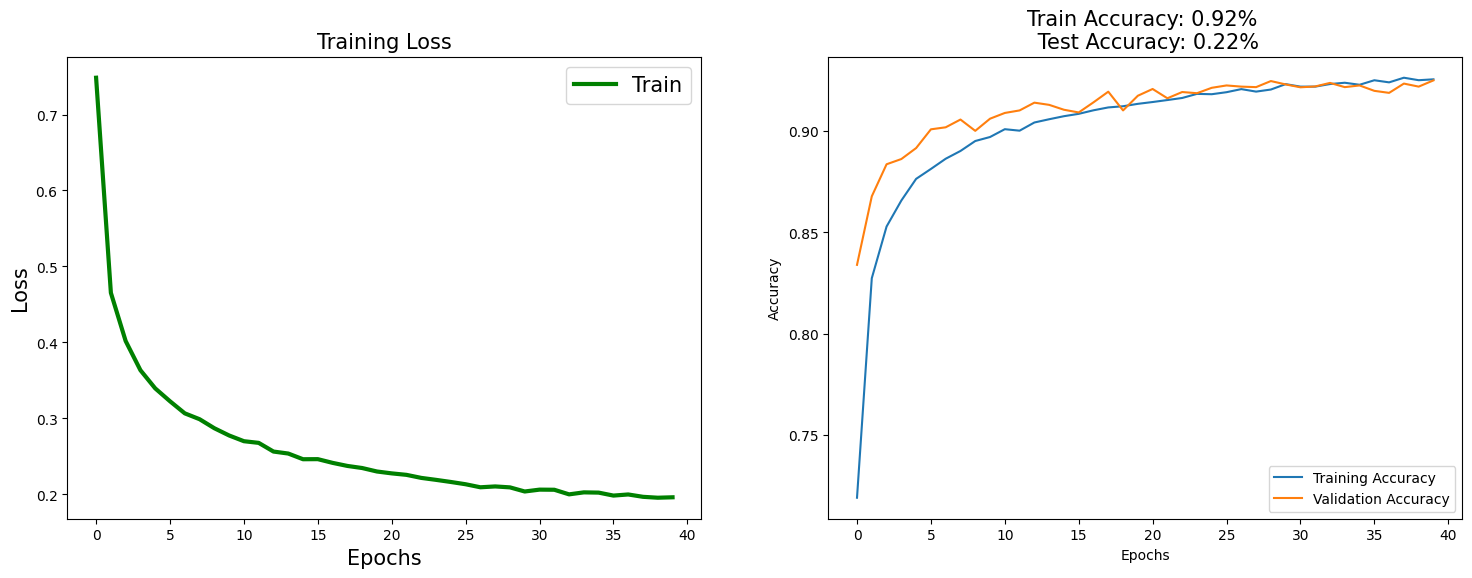

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(history2.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(history2.history['accuracy'], label='Training Accuracy')
ax[1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
score2 = model2.evaluate(test_images, test_labels, verbose=0)
ax[1].set_title(f'Train Accuracy: {score2[1]:.2f}% \n Test Accuracy: {score2[0]:.2f}%', fontsize = 15)

## Third Model

In [ ]:
model3 = Sequential([
    Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    Dropout(0.45),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train Model

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history3 = model3.fit(X_train, y_train, batch_size=128,
                    epochs=40,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9208 - loss: 0.2137 - val_accuracy: 0.9215 - val_loss: 0.2138
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9242 - loss: 0.2038 - val_accuracy: 0.9217 - val_loss: 0.2176
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9214 - loss: 0.2063 - val_accuracy: 0.9208 - val_loss: 0.2205
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9253 - loss: 0.1957 - val_accuracy: 0.9251 - val_loss: 0.2103
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9280 - loss: 0.1895 - val_accuracy: 0.9186 - val_loss: 0.2219
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9303 - loss: 0.1826 - val_accuracy: 0.9219 - val_loss: 0.2148
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9282 - loss: 0.1850 - val_accuracy: 0.9223 - val_loss: 0.2115
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9325 - loss: 0.1792 - val_accuracy: 0

## Visualizing the Loss and Accuracies

Text(0.5, 1.0, 'Train Accuracy: 0.92% \n Test Accuracy: 0.22%')

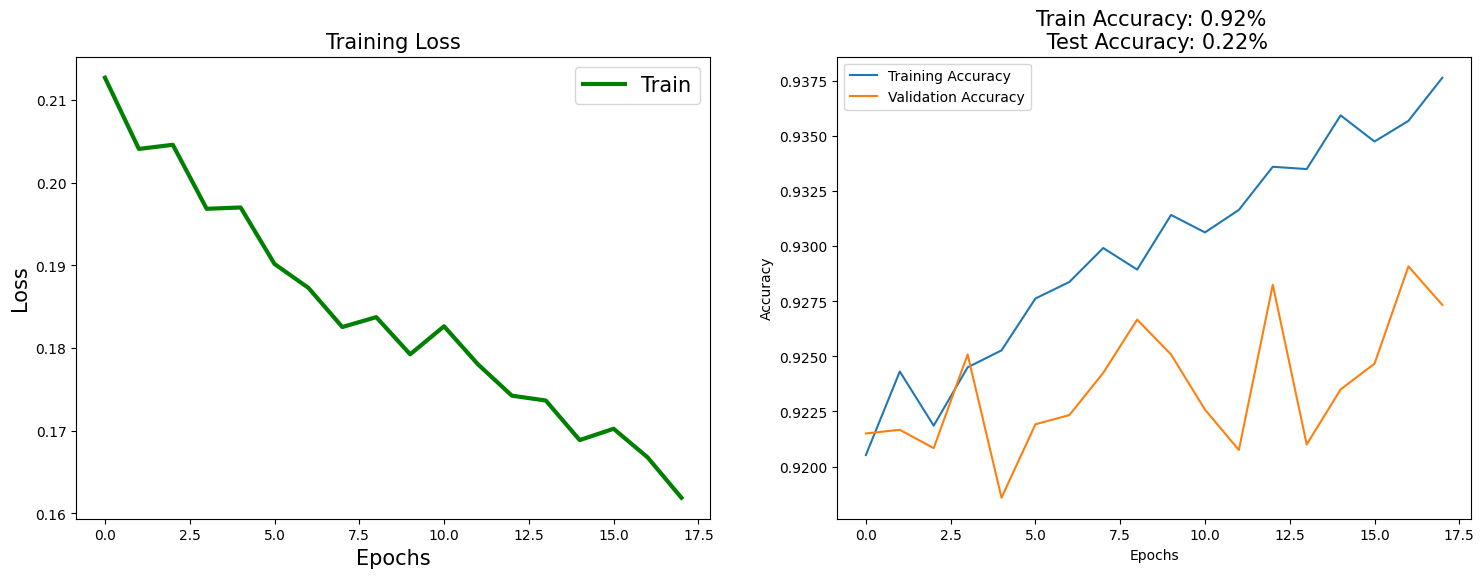

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(history3.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(history3.history['accuracy'], label='Training Accuracy')
ax[1].plot(history3.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
score3 = model3.evaluate(test_images, test_labels, verbose=0)
ax[1].set_title(f'Train Accuracy: {score2[1]:.2f}% \n Test Accuracy: {score2[0]:.2f}%', fontsize = 15)

## Predictions

In [ ]:
print("PREDICTION BY MODEL1:")
predicted_probs = model1.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])

print("PREDICTION BY MODEL2:")
predicted_probs = model2.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])

print("PREDICTION BY MODEL3:")
predicted_probs = model3.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])

PREDICTION BY MODEL1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
PREDICTION BY MODEL2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
PREDICTION BY MODEL3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


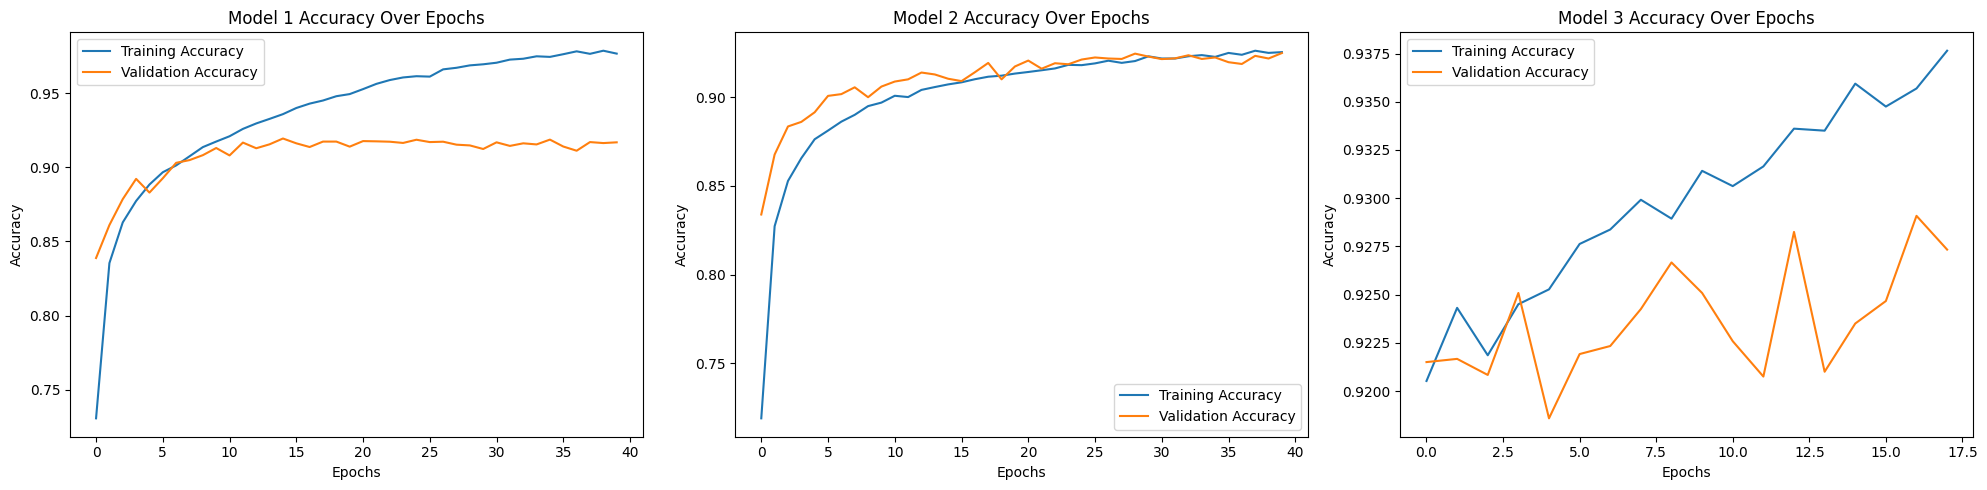

Model 1 - Test Loss: 0.4666, Test Accuracy: 0.9072
Model 2 - Test Loss: 0.2247, Test Accuracy: 0.9205
Model 3 - Test Loss: 0.2384, Test Accuracy: 0.9146


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Model 1
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].set_title('Model 1 Accuracy Over Epochs')

# Model 2
axs[1].plot(history2.history['accuracy'], label='Training Accuracy')
axs[1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Model 2 Accuracy Over Epochs')

# Model 3
axs[2].plot(history3.history['accuracy'], label='Training Accuracy')
axs[2].plot(history3.history['val_accuracy'], label='Validation Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')
axs[2].legend()
axs[2].set_title('Model 3 Accuracy Over Epochs')

plt.tight_layout()
plt.show()

# Display the metrics below the graphs
print(f"Model 1 - Test Loss: {score1[0]:.4f}, Test Accuracy: {score1[1]:.4f}")
print(f"Model 2 - Test Loss: {score2[0]:.4f}, Test Accuracy: {score2[1]:.4f}")
print(f"Model 3 - Test Loss: {score3[0]:.4f}, Test Accuracy: {score3[1]:.4f}")
